# **Project Title:-** Market Basket Magic: Extracting Insights for Retail Success

## Importing the Required Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [73]:
df = pd.read_csv("Mall_Customers.csv")

In [74]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

Knowing rows and columns of dataset

In [77]:
df.shape

(200, 5)

Checking for any empty/null observation

In [78]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Descriptive analysis

In [79]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Encoding the "Gender" column

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [82]:
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('CustomerID', axis=1))

## Machine Learning approach with clustering algorithm

In [85]:
from sklearn import cluster

In [86]:
new_df = df.iloc[:,-2:]
new_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [87]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=4)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

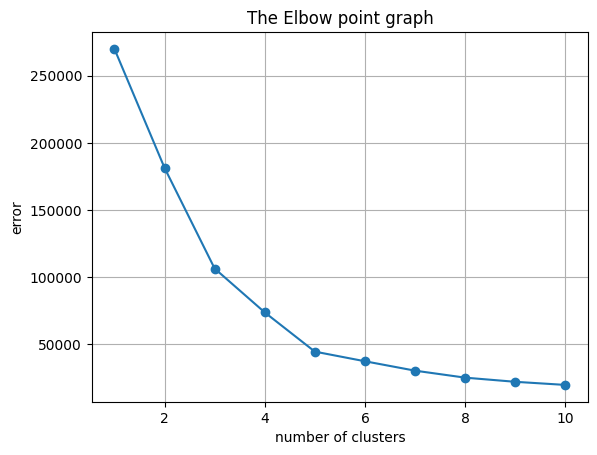

In [92]:
plt.plot(range(1,11),error,'o-')
plt.grid(True)
plt.title('The Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [93]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [94]:
pred = km_model.predict(new_df)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [101]:
original_counts = pd.Series(pred).value_counts().sort_index()

In [102]:
predicted_counts = pd.Series(pred).value_counts().sort_index()

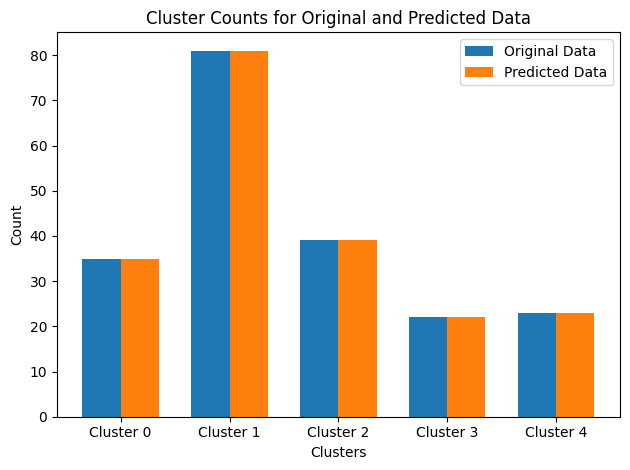

In [103]:
x_labels = [f'Cluster {i}' for i in range(len(original_counts))]
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(original_counts)), original_counts, width, label='Original Data')
rects2 = ax.bar(np.arange(len(predicted_counts)) + width, predicted_counts, width, label='Predicted Data')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Cluster Counts for Original and Predicted Data')
ax.set_xticks(np.arange(len(original_counts)) + width / 2)
ax.set_xticklabels(x_labels)
ax.legend()
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'K-means Clustering (Original Data)')

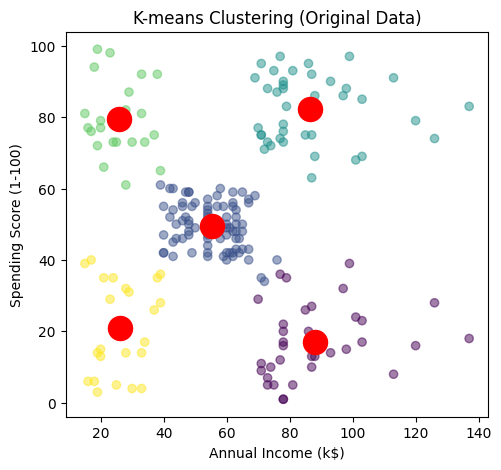

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 1], c=pred, cmap='viridis', alpha=0.5)
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering (Original Data)')

In [97]:
test_data = np.array([[30, 70], [80, 20], [60, 60]])

In [105]:
test_pred = km_model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


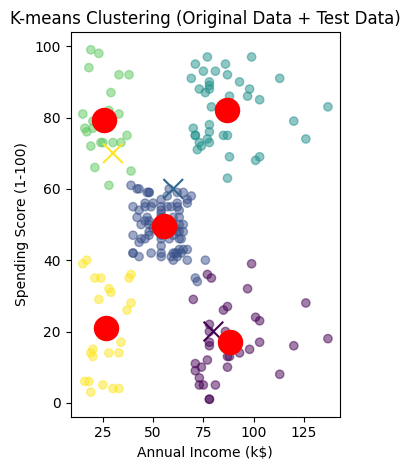

In [99]:
plt.subplot(1, 2, 2)
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 1], c=pred, cmap='viridis', alpha=0.5)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_pred, marker='x', s=200, cmap='viridis')
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering (Original Data + Test Data)')
plt.tight_layout()
plt.show()